Задание

При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.


In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [ ]:
list_strategy = ['best1bin', 'best1exp','randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
result_nit = []
for st in list_strategy:
  result_1 = differential_evolution(ackley, bounds, strategy=st, seed=42)
  result_nit.append(result_1.nit)

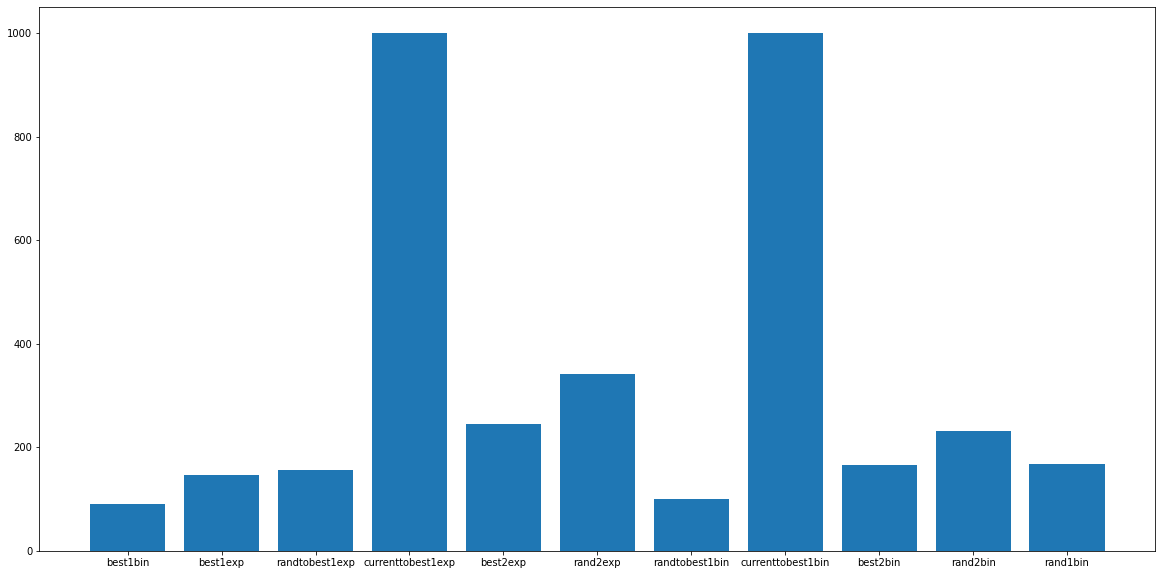

In [ ]:
plt.figure(figsize=(20, 10))    
plt.bar(list_strategy, result_nit)
plt.show()

In [ ]:
result_nit = []
size_list = []
for size in range(1,200,20):
  result_1 = differential_evolution(ackley, bounds, popsize=size)
  result_nit.append(result_1.nit)
  size_list.append(size)

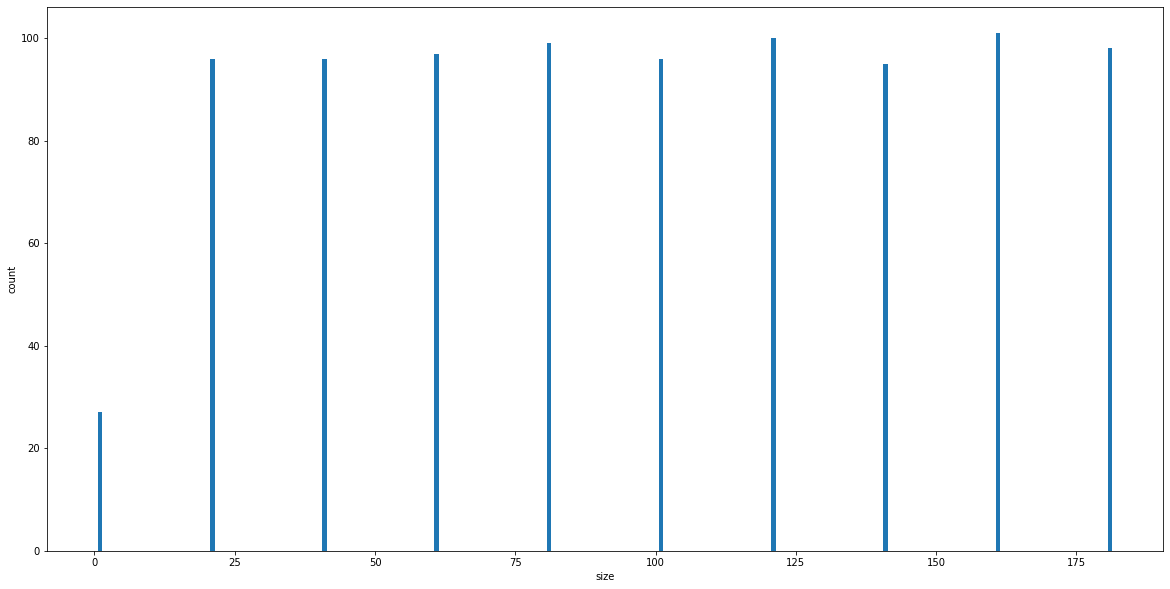

In [ ]:
plt.figure(figsize=(20, 10))    
plt.bar(size, result_nit)
plt.xlabel('size')
plt.ylabel('count')
plt.show()

In [ ]:
result_nit = []
mutation = []
for mut in np.arange(0.1,2,0.02):
  result_1 = differential_evolution(ackley, bounds, mutation=mut)
  result_nit.append(result_1.nit)
  mutation.append(mut)

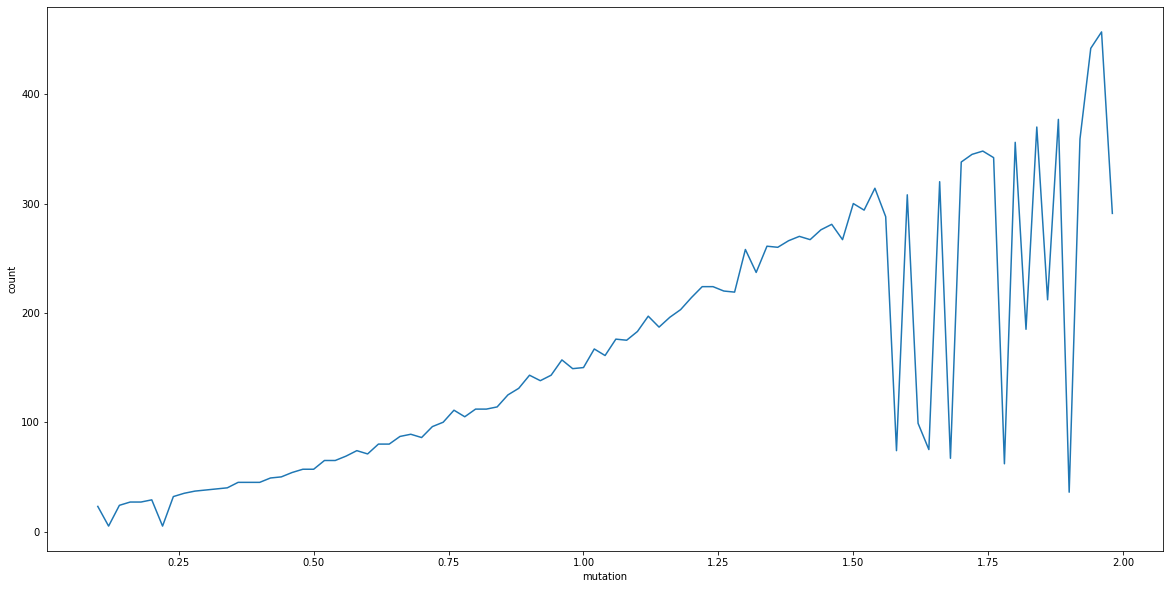

In [ ]:
plt.figure(figsize=(20, 10))    
plt.plot(mutation, result_nit)
plt.xlabel('mutation')
plt.ylabel('count')
plt.show()

Дополнительное задание

Поэкспериментируйте с параметрами и оптимизацией через minimize:


In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
methods = ['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC', 'SLSQP']

In [ ]:
list_nits = []
for m in methods:
  result_m = minimize(ackley, x0,  method=m)
  list_nits.append(result_m.nit)

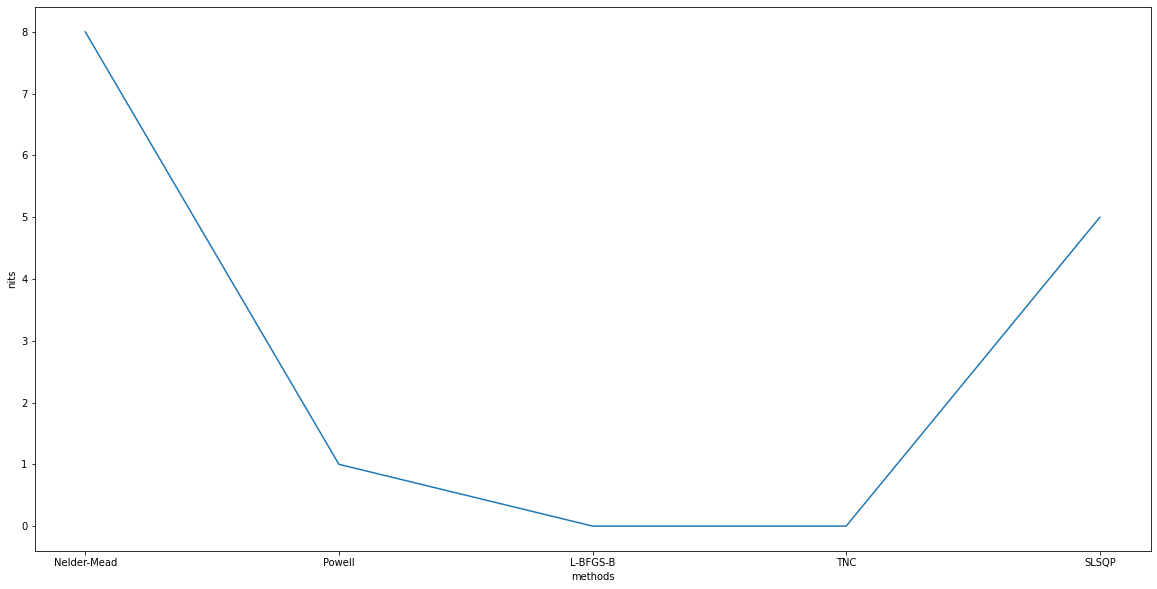

In [ ]:
plt.figure(figsize=(20, 10)) 
plt.plot(methods, list_nits)   
plt.xlabel('methods')
plt.ylabel('nits')
plt.show()